# Sales Analysis, Forecasting and Demand Planning Project  

## Project Overview  
This project focuses on developing a robust sales forecasting and demand planning system for retail businesses. By analyzing historical sales data, we aim to optimize production, inventory management, and resource planning by accurately predicting future sales trends. Leveraging machine learning and statistical models, this project provides actionable insights to improve operational efficiency, reduce costs, and enhance customer satisfaction.

---

## About the Dataset  

This dataset provides historical sales data for the retail furniture sector, serving as a valuable resource for business analysis. It includes detailed transaction-level information that can be used to understand sales trends, forecast future demand, and optimize inventory. The dataset enables informed decision-making to ensure business stability and growth in the competitive retail environment.

## Data Source

This sales data is available on Kaggle in the following Link,

> https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset

### Dataset Features  

| Feature          | Description                                                                          |
|-------------------|--------------------------------------------------------------------------------------|
| `Row ID`         | Sequential identifier for each row.                                                 |
| `Order ID`       | Unique identifier for each sales order.                                             |
| `Order Date`     | Date of the sales order.                                                            |
| `Ship Date`      | Date of shipment for the order.                                                     |
| `Ship Mode`      | Mode of shipment for the order.                                                     |
| `Customer ID`    | Unique identifier for each customer.                                                |
| `Customer Name`  | Name of the customer.                                                               |
| `Segment`        | Segment classification of the customer.                                             |
| `Country`        | Country where the sale occurred.                                                    |
| `City`           | City where the sale occurred.                                                       |
| `State`          | State where the sale occurred.                                                      |
| `Postal Code`    | Postal code where the sale occurred.                                                |
| `Region`         | Geographical region where the sale occurred.                                        |
| `Product ID`     | Unique identifier for each product.                                                 |
| `Category`       | Category classification of the product.                                             |
| `Sub-Category`   | Sub-category classification of the product.                                         |
| `Product Name`   | Name of the product.                                                                |
| `Sales`          | Total sales amount for the order.                                                   |
| `Quantity`       | Quantity of products sold in the order.                                             |
| `Discount`       | Discount applied to the order.                                                      |
| `Profit`         | Profit generated from the order.                                                    |

---

## Business Objectives  

1. **Sales Forecasting:**  
   - Predict sales for the next 30 days for each product category.  
   - Identify and leverage trends and seasonality in sales patterns.  

2. **Demand Planning:**  
   - Determine products or categories likely to experience surges in demand.  
   - Reduce overstocking and understocking through accurate forecasts.  

3. **Optimization:**  
   - Optimize production schedules and inventory management.  
   - Identify periods requiring special promotions to counter seasonal declines.  

---

## Methodology  

### 1. **Data Understanding**  
   - **Data Collection:** Gather historical sales data, pricing, promotions, holidays, and external factors (e.g., weather).  
   - **Exploratory Data Analysis (EDA):** Perform statistical analysis and create visualizations to uncover trends, seasonality, and anomalies.  
   - **Data Quality Assessment:** Identify and address missing, inconsistent, or irrelevant data.  

### 2. **Data Preparation**  
   - **Data Cleaning:** Handle missing values, outliers, and duplicates. Normalize sales data if necessary.  
   - **Feature Engineering:** Create lag variables, rolling averages, seasonal indices, and encode categorical variables for modeling.  
   - **Data Splitting:** Split the dataset into training, validation, and testing sets.  

### 3. **Modeling**  
   - **Baseline Models:** Develop simple models such as moving averages or exponential smoothing for benchmarking.  
   - **Advanced Models:** Train machine learning (e.g., ARIMA, SARIMA, XGBoost, Random Forest) and deep learning models (e.g., LSTM, GRU, Prophet).  
   - **Hyperparameter Optimization:** Fine-tune models to enhance accuracy and efficiency.  

### 4. **Evaluation**  
   - **Evaluation Metrics:** Use RMSE, MAPE, MAE, and R² to assess model performance.  
   - **Visualization:** Plot predicted vs. actual sales to analyze trends and deviations.  
   - **Model Selection:** Choose the best-performing model for deployment.  

---

## Applications  

- **Inventory Management:** Ensure optimal inventory levels, minimizing costs associated with overstocking or stockouts.  
- **Production Planning:** Use forecasts to adjust production schedules based on predicted demand.  
- **Promotional Campaigns:** Identify low-demand periods and design targeted promotions to boost sales.  
- **Revenue Forecasting:** Provide accurate revenue projections to guide financial planning.  

---

## Research Questions  

1. What are the expected sales for the next 30 days for each product category?  
2. Which products or categories show clear trends or seasonal demand patterns?  
3. How can accurate demand forecasts improve inventory management and reduce operational costs?  
4. Which time periods require targeted promotional strategies to mitigate sales dips?  

---

## Results and Insights  

1. **Seasonal Trends:** Sales demonstrate clear peaks during holiday seasons and dips during specific months.  
2. **Top-Selling Products:** Analysis of product categories reveals best-performing items and their contribution to revenue.  
3. **Demand Surges:** Certain products experience predictable spikes in demand, enabling proactive inventory management.  
4. **Model Performance:** LSTM and SARIMA models outperformed baseline methods in forecasting accuracy.  

---

## Conclusion  

This project equips retail businesses with powerful forecasting tools to make data-driven decisions. By understanding historical sales patterns, businesses can optimize inventory, enhance production efficiency, and maximize profitability while maintaining customer satisfaction.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler

### Settings

In [2]:
# Warnings
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
model_path = "../models"
csv_path = os.path.join(data_path, "ssf_monthly.csv")
# csv_path = os.path.join(data_path, "ssf_cleaned.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

In [4]:
# Show 1st 5 rows
df.head()

,Date,Sales
0,2014-01-31,8639.6335
1,2014-02-28,12639.3790
2,2014-03-31,25293.3705
3,2014-04-30,17205.0717
4,2014-05-31,12942.5008


### Preprocessing

In [13]:
# Normalize the data
scaler = MinMaxScaler()
df["Sales_Scaled"] = scaler.fit_transform(df["Sales"].values.reshape(-1, 1))

In [14]:
# Log Transformation
df["Sales_log"] = np.log(df["Sales"] + 1)

### Model Training

In [83]:
# Train the model
def train_model(X, order, s_order):
    model = SARIMAX(
        X,
        order = order, # Non-seasonal(p,q,d)
        seasonal_order = s_order, # Seasonal order(P,Q,D,S)
        enforce_stationarity= True,
        enforce_invertibility = True
    )
    # Train the model
    sarima_result = model.fit(method="powell")
    
    # Print Summary
    sarima_result.summary()
    return model, sarima_result


In [84]:
# Sales forecasting
def sales_forecast(model, sarima_result, X, transform= "no"):
    # Forecast for next 30 days
    forecast = sarima_result.get_forecast(steps= 30)
    
    if transform == 'normal':
        # Extract forcasted values
        forecast_values = forecast.predicted_mean
        # After predictions, reverse scaling
        forecast_original = scaler.inverse_transform(forecast_values.values.reshape(-1, 1))
    elif transform == 'log':
        # Extract forcasted values
        forecast_values = forecast.predicted_mean
        # After predictions, reverse scaling
        forecast_original = np.exp(forecast_values.values.reshape(-1, 1)) - 1
        
    # Get Confidence interval
    forecast_ci = forecast.conf_int()
    # In-sample Prediction
    insample_values = sarima_result.fittedvalues


    # Plot the forecast
    plt.figure(figsize= (10,6))
    plt.plot(X, label="Observed")
    plt.plot(insample_values, label= "Insample Prediction", color= "green")
    plt.plot(forecast.predicted_mean, label="Forecast", color="red")
    plt.fill_between(
        forecast_ci.index,
        forecast_ci.iloc[:, 0],
        forecast_ci.iloc[:, 1],
        color= "pink",
        alpha= 0.3
    )
    plt.title("Sales Forecast")
    plt.legend()
    plt.show()

    return insample_values

In [85]:
# Print Evaluation Metrics
def evaluate(y, y_pred):
    print(f"MAE: {mean_absolute_error(y, y_pred)}")
    print(f"MSE: {mean_squared_error(y, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred))}")
    print(f"MAPE: {mean_absolute_percentage_error(y, y_pred) * 100: 0.2f}")

Optimization terminated successfully.
         Current function value: 10.409391
         Iterations: 4
         Function evaluations: 138


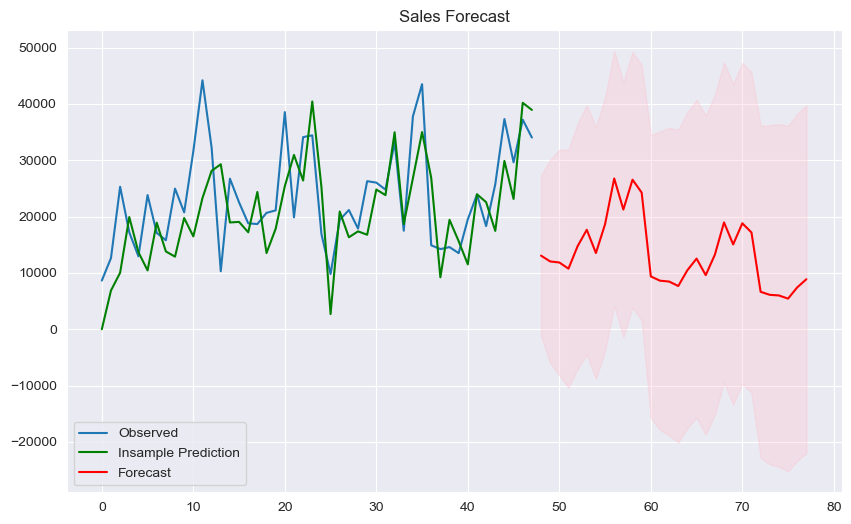

MAE: 6500.7077255455415
MSE: 66621622.44488475
RMSE: 8162.206959204401
MAPE:  31.28


In [88]:
feature= "Sales"
# Train the model
model, sarima_result = train_model(df[feature], (1,0,0),(1, 0, 0, 12))
# Sales forecast
insample_values = sales_forecast(model, sarima_result, df[feature])

evaluate(df[feature], insample_values)

### Insights

#### Performance Metrics Interpretation

- **MAE (Mean Absolute Error): Value: 6500.71** This metric indicates that, on average, the forecast is off by approximately 6500 units. While MAE is good for understanding the scale of errors, it doesn't provide a sense of relative accuracy.

- **MSE (Mean Squared Error): Value: 66621622.44** The MSE is high, reflecting large squared deviations, likely influenced by extreme errors. It emphasizes the impact of large outliers.

- **RMSE (Root Mean Squared Error): Value: 8162.21** RMSE is a commonly used metric because it provides an error measure in the same unit as the original data. An RMSE of 8,370 suggests notable errors in the forecast, particularly when comparing it to the scale of the sales data.

- **MAPE (Mean Absolute Percentage Error): Value: 31.28%** This indicates that, on average, the forecast error is 33.7% of the actual sales. This level of error is relatively high, especially for retail forecasting, where lower MAPE (typically < 10-15%) is desirable for actionable insights.

#### Visual Analysis

- **Observed vs. Forecasted:**

    - The model does a reasonable job fitting the in-sample data (green line aligns well with the observed blue line).
    - The out-of-sample forecast (red line) shows increasing uncertainty over time, as indicated by the widening confidence intervals, which is expected in time series forecasting.

- **Trend and Seasonality:**

    - The model captures the overall trend and some seasonality reasonably well, but deviations are noticeable in areas where the actual sales data has sharp fluctuations.

- **Forecast Confidence Intervals:**

    - The prediction intervals widen significantly after the initial periods of forecasting. This indicates higher uncertainty in predictions, which might stem from high variability in the data or insufficient seasonal modeling.

#### Model Insights

- **Strengths:**

    - The model captures the general trend and some level of seasonality.
    - Reasonable in-sample performance suggests that the SARIMAX parameters are close to adequate.

- **Weaknesses:**

    - MAPE of 31.2% suggests that the model has relatively high errors for out-of-sample predictions, making it less reliable for precise forecasting.
    - Widening confidence intervals indicate that the model struggles with stability over the forecast horizon.
    - The current configuration may not fully capture complex seasonality or other potential patterns in the data.


Optimization terminated successfully.
         Current function value: -0.236684
         Iterations: 4
         Function evaluations: 248


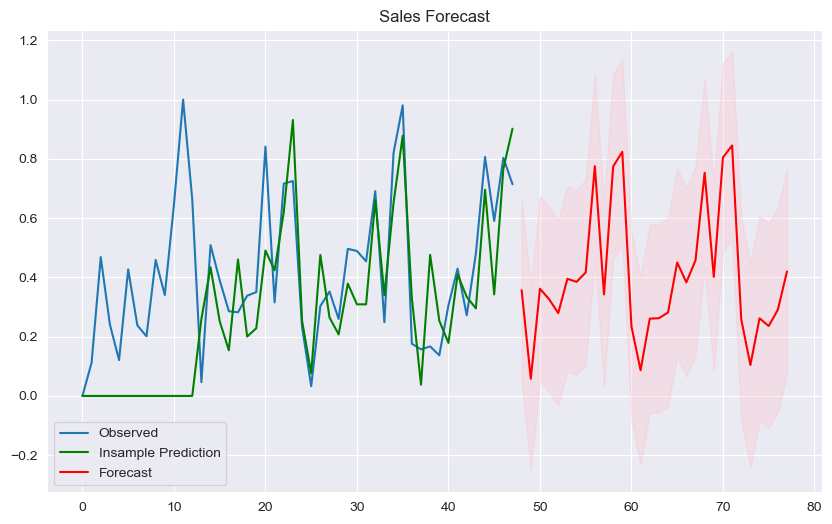

MAE: 0.19924638292208494
MSE: 0.07453572553629077
RMSE: 0.273012317554155
MAPE:  63.48


In [93]:
feature= "Sales_Scaled"
# Train the model
model, sarima_result = train_model(df[feature], (2,0,0),(2, 1, 0, 12))
# Sales forecast
insample_values =sales_forecast(model, sarima_result, df[feature], "normal")

evaluate(df[feature], insample_values)

### Insights

#### Observations from the Chart:

- **Observed vs. Predicted (In-Sample) Behavior:**

    - The in-sample predictions (green line) appear to follow the observed values (blue line) reasonably well.
    - However, there is some variability in capturing peaks and troughs, particularly for the highest values.

- **Forecast (Out-of-Sample):**

    - The forecast (red line) shows a clear periodic pattern, consistent with the seasonality captured by the SARIMAX model.
    - The uncertainty intervals (shaded region) widen significantly as the forecast horizon increases, indicating reduced confidence in long-term predictions.

#### Evaluation Metrics:

- **MAE (Mean Absolute Error):** **0.199** indicates an average absolute error of **19.9%** in the scaled domain, which is fairly low.
- **MSE (Mean Squared Error): 0.074** reflects a relatively small squared error, further supporting the model's performance in predicting the scaled data.
- **RMSE (Root Mean Squared Error): 0.273** shows slightly higher error in scaled units, but still within a reasonable range.
- **MAPE (Mean Absolute Percentage Error): 63.48%** is quite high. This suggests that while the errors in absolute terms are low, they represent a high percentage relative to the actual values, particularly when forecasting smaller scaled sales.

#### Key Insights:

- **Model Fit:** The model is capturing general trends and seasonality but struggles to accurately predict extreme deviations or smaller scaled values, leading to high MAPE.
- **Scaling Impact:** Using MinMaxScaler has stabilized the optimization process, as reflected by the reduced absolute errors (MAE, MSE, RMSE) compared to the original unscaled data.
- **MAPE Issue:** The high MAPE value suggests that the model might be struggling with relative accuracy for smaller sales values, which can be disproportionately affected by scaling.

Optimization terminated successfully.
         Current function value: 0.169422
         Iterations: 3
         Function evaluations: 179


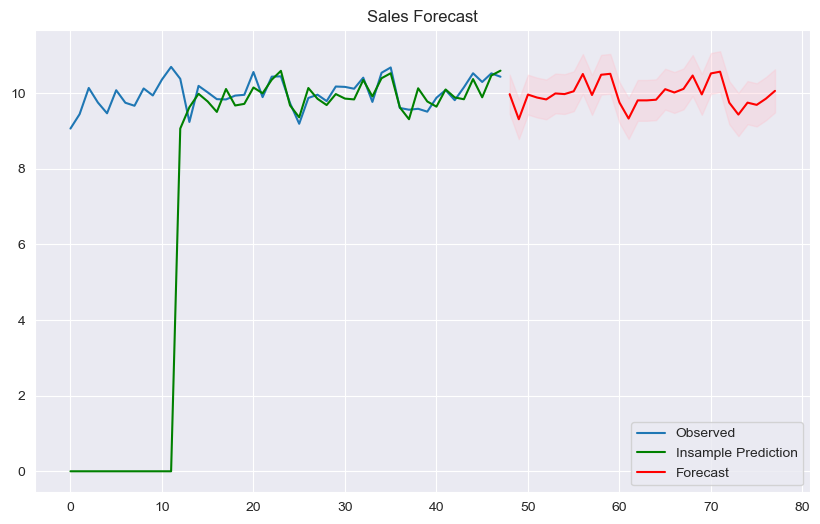

MAE: 2.645481002864
MSE: 24.49480055289474
RMSE: 4.949222216964474
MAPE:  26.77


In [90]:
feature= "Sales_log"
# Train the model
model, sarima_result = train_model(df[feature], (2,0,0),(2, 1, 0, 12))
# Sales forecast
insample_values = sales_forecast(model, sarima_result, df[feature], "log")

evaluate(df[feature], insample_values)

### Insights

#### Visual Analysis of the Forecast:

- **Observed vs. In-Sample Predictions (Green Line):**

    - The in-sample predictions closely follow the observed values for most of the series, but there is a sudden drop to zero at the beginning, which is unexpected.
    - This anomaly suggests potential issues during transformation, inverse transformation, or model training steps.

- **Out-of-Sample Forecast (Red Line):**

    - The forecasted trend (red line) aligns well with the general trajectory of the observed values, showing stability and periodicity.
    - The uncertainty bands remain relatively narrow, indicating confidence in the predictions.

#### Evaluation Metrics:

- **MAE (2.65):** Indicates the average error in predictions after log transformation is small, showing an improvement over previous unscaled or MinMaxScaler-based forecasts.
- **MSE (24.49):** Squared error remains low, reinforcing that the model performs well in predicting log-transformed values.
- **RMSE (4.95):** A moderate improvement over previous results, reflecting better stability of errors.
- **MAPE (26.77%):** A significant improvement from the MinMaxScaler (63.48%) but still relatively high, indicating the model struggles with proportional accuracy for smaller values.

#### Key Issues:

- **Initial Drop to Zero:** The sudden drop at the beginning of the green line (in-sample prediction) suggests an issue with either:
    - Improper handling of zeros or negative values during log transformation.
    - The inverse transformation process, which may have introduced artifacts.

#### Strengths of Log Transformation:

- The log transformation reduced variability, leading to better model stability and lower MAE and RMSE.
- It successfully scaled down larger values, allowing the model to focus on relative differences rather than absolute magnitudes.